In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import special

In [2]:
def sharlie(n):
    return special.erfinv((n - 1) / n)*np.sqrt(2)

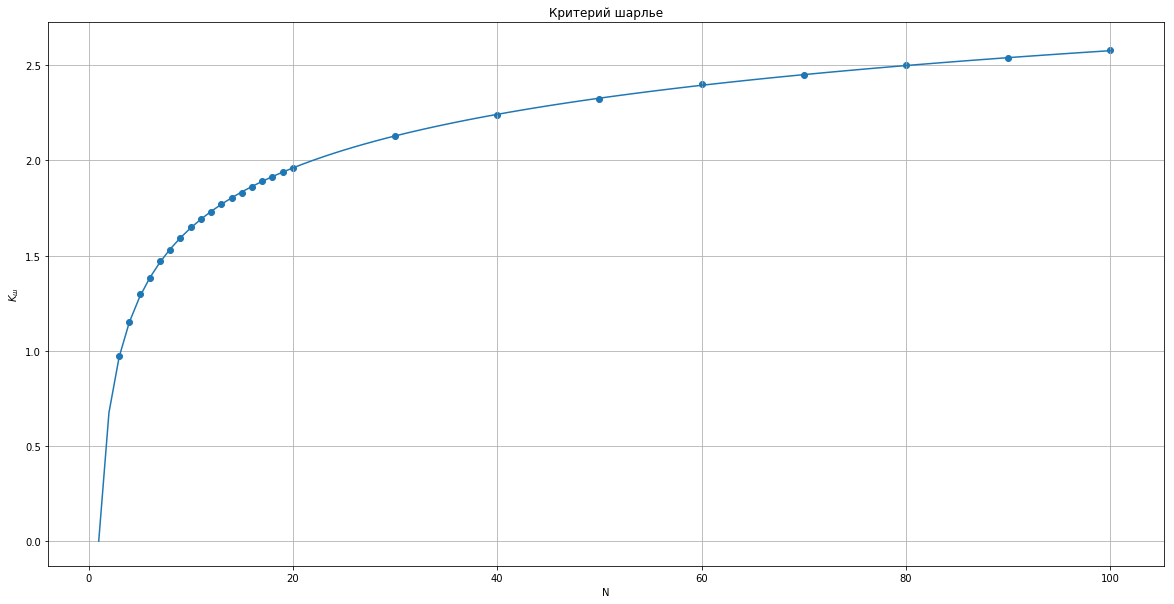

In [3]:
plt.figure(figsize=(20,10))
_x = np.arange(1, 101, 1)
n = [3,4, 5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19, 20, 30, 40, 50, 60, 70, 80 ,90, 100]
K = [0.97, 1.15, 1.3, 1.38,1.47, 1.53,1.59,1.65,1.69,1.73,1.77,1.8,1.83,1.86,1.89,1.91,1.94,1.96,2.13,2.24,2.32,2.40,2.45,2.50,2.54,2.58]
plt.grid(True)
plt.title('Критерий шарлье')
plt.xlabel('N')
plt.ylabel('$K_ш$')
plt.plot(_x, sharlie(_x))
plt.scatter(n, K)
plt.show()

In [37]:
def metric(x):
    return np.abs(x - x.mean()) / np.sqrt(np.sum((x - x.mean())** 2) / (len(x) - 1))

In [50]:
def borders(x):
    sh = sharlie(len(x))
    s = np.sqrt(np.sum((x - x.mean())** 2) / (len(x) - 1))
    m = x.mean()
    return m - sh * s, m + sh * s

In [44]:
def find_bad(x):
    test = metric(x)
    mask = test > sharlie(len(x))
    bad = x[mask]
    x = x[~mask]
    return x, bad  

In [45]:
def save_data(x, filename):
    with open(filename, 'w') as f:
        for i in x:
            print(i, file=f)

In [55]:
def calc(filename):
    X = []
    with open(filename, 'r') as f:
        for i in f:
            X.append(float(i.replace(",", ".")))
    X = np.array(X)
    bad = [0]
    i = 0
    f = plt.figure(figsize=(20,20))
    ok = X.copy()
    while len(bad) != 0:
        i += 1
        ax = f.add_subplot(3,3,i)
        border = borders(ok)
        ok, bad = find_bad(ok)
        print("Ok: ", *ok)
        print("Bad: ", *bad)
        iterator_ok = np.arange(len(X))[np.isin(X, ok)]
        iterator_bad = np.arange(len(X))[np.isin(X, bad)]
        ax.grid(True)
        ax.set_title('Обработка выборки')
        ax.xlabel = '#'
        ax.ylabel = 'Значение'
        ax.hlines(border, 0, len(X) - 1, color="r", linestyles="dashed")
        ax.scatter(iterator_ok,ok,  label='Хорошие значения')
        ax.scatter(iterator_bad,bad,  label='Промахи')
        ax.legend()

    plt.show()
    save_data(ok, filename + ".ok.txt")
    save_data(bad, filename + ".bad.txt")    

Ok:  0.64661 0.64603 0.64892 0.64926 0.64795 0.64951 0.64354 0.64439 0.64489 0.64994
Bad:  0.66815
Ok:  0.64661 0.64603 0.64892 0.64926 0.64795 0.64951 0.64354 0.64439 0.64489 0.64994
Bad: 


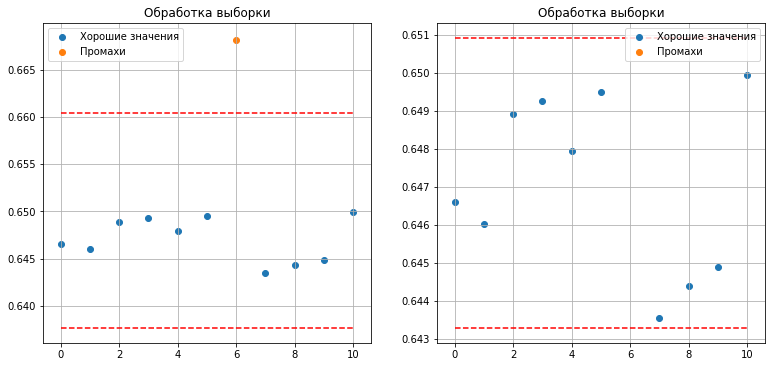

In [56]:
calc('data/Chrl_v06_a.txt')

Ok:  1.5177 1.5227 1.5323 1.5168 1.5275 1.5273 1.53 1.5165 1.5162 1.5205 1.519
Bad:  1.483
Ok:  1.5177 1.5227 1.5323 1.5168 1.5275 1.5273 1.53 1.5165 1.5162 1.5205 1.519
Bad: 


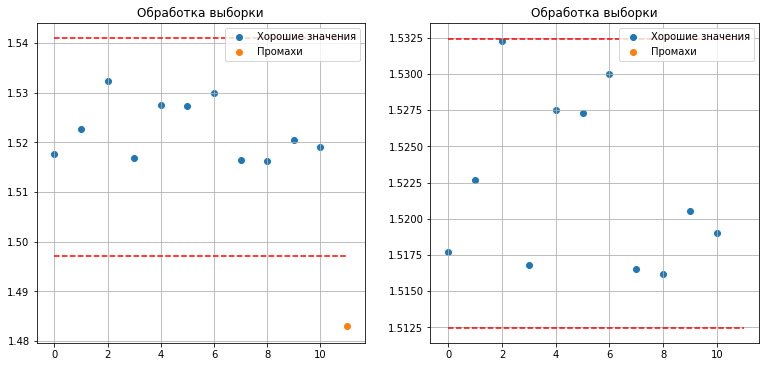

In [57]:
calc('data/Chrl_v06_b.txt')

Ok:  3.6662 3.6518 3.6427 3.6385 3.6762 3.6256 3.6352 3.6171 3.6591 3.6484 3.6772 3.6683 3.6735 3.6523 3.6588 3.6422 3.6457 3.6343
Bad:  3.6966
Ok:  3.6662 3.6518 3.6427 3.6385 3.6762 3.6256 3.6352 3.6591 3.6484 3.6772 3.6683 3.6735 3.6523 3.6588 3.6422 3.6457 3.6343
Bad:  3.6171
Ok:  3.6662 3.6518 3.6427 3.6385 3.6762 3.6256 3.6352 3.6591 3.6484 3.6772 3.6683 3.6735 3.6523 3.6588 3.6422 3.6457 3.6343
Bad: 


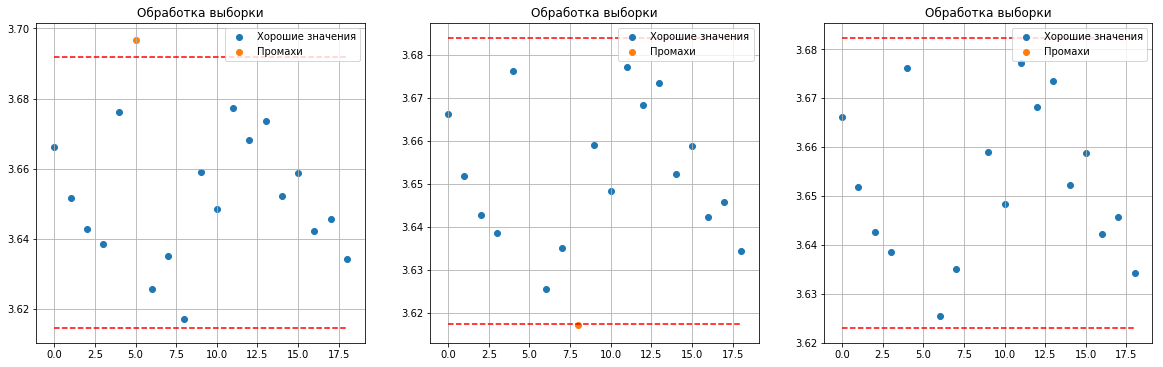

In [58]:
calc('data/Chrl_v06_c.txt')

Ok:  1.0 40.0 50.0
Bad:  100.0
Ok:  40.0 50.0
Bad:  1.0
Ok: 
Bad:  40.0 50.0


ZeroDivisionError: division by zero

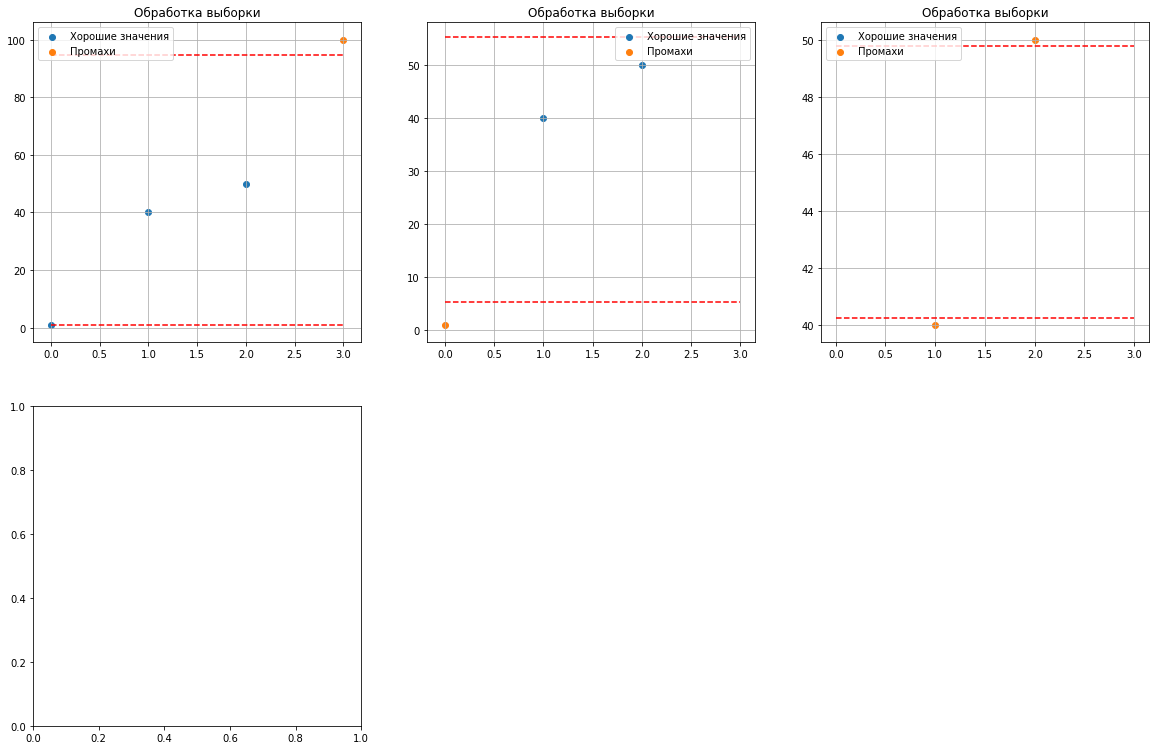

In [64]:
calc('data/lin.txt')